# Aggregate Productivity Shocks

In [1]:
from time import process_time

import matplotlib.pyplot as plt
import numpy as np

from HARK.ConsumptionSaving.ConsAggShockModel import (
    AggShockConsumerType,
    AggShockMarkovConsumerType,
    CobbDouglasEconomy,
    CobbDouglasMarkovEconomy,
)
from HARK.distributions import DiscreteDistribution
from HARK.utilities import plot_funcs


def mystr(number):
    return f"{number:.4f}"

In [2]:
# Solve an AggShockConsumerType's microeconomic problem
solve_agg_shocks_micro = False
# Solve for the equilibrium aggregate saving rule in a CobbDouglasEconomy
solve_agg_shocks_market = True
# Solve an AggShockMarkovConsumerType's microeconomic problem
solve_markov_micro = False
# Solve for the equilibrium aggregate saving rule in a CobbDouglasMarkovEconomy
solve_markov_market = True
# Solve a simple Krusell-Smith-style two state, two shock model
solve_krusell_smith = True
# Solve a CobbDouglasEconomy with many states, potentially utilizing the "state jumper"
solve_poly_state = False

### Example implementation of AggShockConsumerType

In [3]:
if solve_agg_shocks_micro or solve_agg_shocks_market:
    # Make an aggregate shocks consumer type
    AggShockExample = AggShockConsumerType()
    AggShockExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    EconomyExample = CobbDouglasEconomy(agents=[AggShockExample])
    EconomyExample.make_AggShkHist()  # Simulate a history of aggregate shocks
    EconomyExample.give_agent_params()  # Have agents collect market-level parameters and construct themselves

In [4]:
if solve_agg_shocks_micro:
    # Solve the microeconomic model for the aggregate shocks example type (and display results)
    t_start = process_time()
    AggShockExample.solve()
    t_end = process_time()
    print(
        "Solving an aggregate shocks consumer took "
        + mystr(t_end - t_start)
        + " seconds.",
    )
    print(
        "Consumption function at each aggregate market resources-to-labor ratio gridpoint:",
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockExample.unpack("cFunc")
    for M in AggShockExample.Mgrid.tolist():
        mMin = AggShockExample.solution[0].mNrmMin(M)
        c_at_this_M = AggShockExample.cFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
        plt.plot(m_grid + mMin, c_at_this_M)
    plt.ylim(0.0, None)
    plt.xlim(0.0, 10.0)
    plt.xlabel(r"Normalized market resources $m_t$")
    plt.ylabel(r"Normalized consumption $c_t$")
    plt.show()

In [5]:
if solve_agg_shocks_market:
    # Solve the "macroeconomic" model by searching for a "fixed point dynamic rule"
    t_start = process_time()
    print(
        "Now solving for the equilibrium of a Cobb-Douglas economy. This might take a few minutes...",
    )
    EconomyExample.solve()
    t_end = process_time()
    print(
        'Solving the "macroeconomic" aggregate shocks model took '
        + mystr(t_end - t_start)
        + " seconds.",
    )

Now solving for the equilibrium of a Cobb-Douglas economy. This might take a few minutes...
intercept=-0.34225704690379455, slope=1.1036802534896566, r-sq=0.9966235168150562
intercept=-0.5048662684011551, slope=1.1521207801269897, r-sq=0.9967296231268286
intercept=-0.44009055091285676, slope=1.1073003762357754, r-sq=0.9796571592307225
intercept=-0.3727583496748521, slope=1.0800958134599425, r-sq=0.9888403549938374
intercept=-0.3507131461697174, slope=1.0714775734787123, r-sq=0.9913861032824601
intercept=-0.3412811495116656, slope=1.0678299783323966, r-sq=0.9917042799357173
intercept=-0.3371997345196811, slope=1.0662638842288006, r-sq=0.9918210930314515
intercept=-0.33543678369689256, slope=1.065591530676302, r-sq=0.9918686991220076
intercept=-0.33467883202472837, slope=1.06530389082849, r-sq=0.9918887018640774
intercept=-0.3343546337095779, slope=1.0651813619488595, r-sq=0.9918971767796609
intercept=-0.3342166296959199, slope=1.0651293833970874, r-sq=0.9919007696687092
intercept=-0.334

Aggregate savings as a function of aggregate market resources:


C:\Users\Matthew\Documents\GitHub\HARK\HARK\ConsumptionSaving\ConsAggShockModel.py:2994: RuntimeWarning: divide by zero encountered in log
  Aagg = np.exp(self.intercept + self.slope * np.log(Mnow))


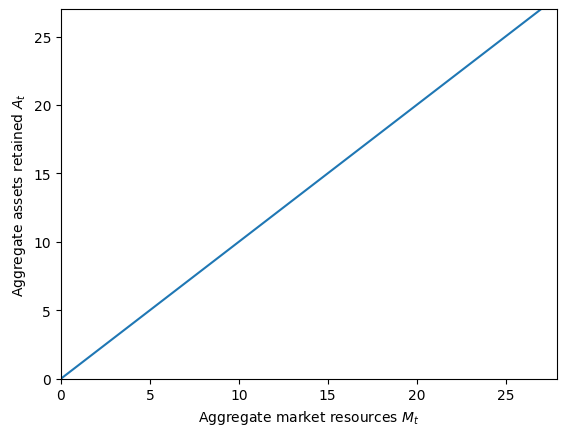

In [6]:
if solve_agg_shocks_market:
    print("Aggregate savings as a function of aggregate market resources:")
    plt.xlabel(r"Aggregate market resources $M_t$")
    plt.ylabel(r"Aggregate assets retained $A_t$")
    plt.ylim(0.0, 27.0)
    plot_funcs(EconomyExample.AFunc, 0, 2 * EconomyExample.kSS)

Consumption function at each aggregate market resources gridpoint (in general equilibrium):


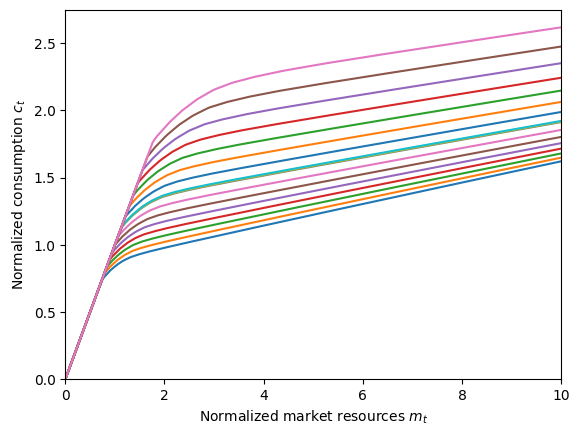

In [7]:
if solve_agg_shocks_market:
    print(
        "Consumption function at each aggregate market resources gridpoint (in general equilibrium):",
    )
    AggShockExample.unpack("cFunc")
    m_grid = np.linspace(0, 10, 200)
    for M in AggShockExample.Mgrid.tolist():
        mMin = AggShockExample.solution[0].mNrmMin(M)
        c_at_this_M = AggShockExample.cFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
        plt.plot(m_grid + mMin, c_at_this_M)
    plt.ylim(0.0, None)
    plt.xlim(0.0, 10.0)
    plt.xlabel(r"Normalized market resources $m_t$")
    plt.ylabel(r"Normalized consumption $c_t$")
    plt.show()

### Example Implementations of AggShockMarkovConsumerType

In [8]:
if solve_markov_micro or solve_markov_market or solve_krusell_smith:
    # Make a Markov aggregate shocks consumer type
    AggShockMrkvExample = AggShockMarkovConsumerType(cycles=0)

    # Make a Cobb-Douglas economy for the agents
    MrkvEconomyExample = CobbDouglasMarkovEconomy(agents=[AggShockMrkvExample])
    MrkvEconomyExample.DampingFac = 0.2  # Turn down damping
    MrkvEconomyExample.make_AggShkHist()  # Simulate a history of aggregate shocks
    MrkvEconomyExample.give_agent_params()  # Have the consumers inherit relevant objects from the economy

In [9]:
if solve_markov_micro:
    # Solve the microeconomic model for the Markov aggregate shocks example type (and display results)
    t_start = process_time()
    AggShockMrkvExample.solve()
    t_end = process_time()
    print(
        "Solving an aggregate shocks Markov consumer took "
        + mystr(t_end - t_start)
        + " seconds.",
    )

    print(
        "Consumption function at each aggregate market \
            resources-to-labor ratio gridpoint (for each macro state):",
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockMrkvExample.unpack("cFunc")
    for i in range(2):
        for M in AggShockMrkvExample.Mgrid.tolist():
            mMin = AggShockMrkvExample.solution[0].mNrmMin[i](M)
            c_at_this_M = AggShockMrkvExample.cFunc[0][i](
                m_grid + mMin,
                M * np.ones_like(m_grid),
            )
            plt.plot(m_grid + mMin, c_at_this_M)
        plt.ylim(0.0, None)
        plt.show()

Now solving a two-state Markov economy. This should take a few minutes...
intercept=[-0.430062793648883, -0.5593886069268711], slope=[1.1093649400605665, 1.1760758345082476], r-sq=[0.9983884180880858, 0.993959087437493]
intercept=[-0.37367280849863393, -0.414184491383495], slope=[1.0718305801212595, 1.084211446145626], r-sq=[0.9998946141824966, 0.9997702549994318]
intercept=[-0.32574803203970637, -0.36724527845084626], slope=[1.0619585906358524, 1.0735597295406312], r-sq=[0.9999480288751184, 0.9999328364044875]
intercept=[-0.33321427631292827, -0.379129293579865], slope=[1.0651300304411082, 1.0781815604554], r-sq=[0.9999438763428687, 0.9999292560206335]
intercept=[-0.3338414759733823, -0.3794926971269227], slope=[1.0653875774089596, 1.078358385999942], r-sq=[0.9999436563965093, 0.9999287137688387]
intercept=[-0.33395180326330787, -0.37956105021186426], slope=[1.0654270574481086, 1.0783865741931447], r-sq=[0.9999436370759014, 0.999928664028442]
intercept=[-0.3339604851607033, -0.3795617

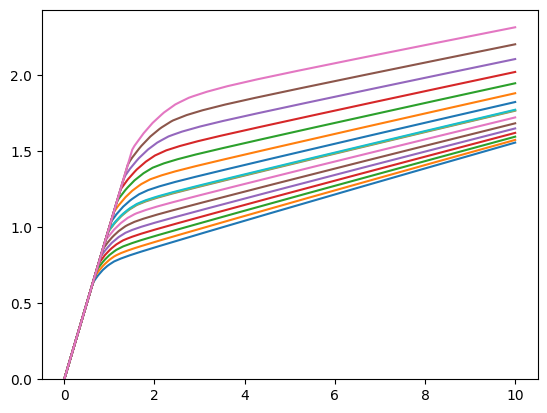

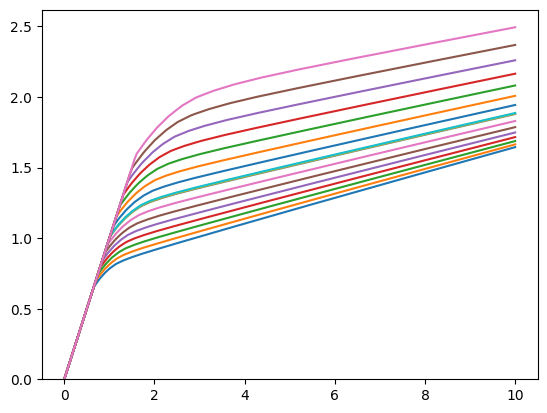

In [10]:
if solve_markov_market:
    # Solve the "macroeconomic" model by searching for a "fixed point dynamic rule"
    t_start = process_time()
    print("Now solving a two-state Markov economy. This should take a few minutes...")
    MrkvEconomyExample.solve()
    t_end = process_time()
    print(
        'Solving the "macroeconomic" aggregate shocks model took '
        + mystr(t_end - t_start)
        + " seconds.",
    )

    print(
        "Consumption function at each aggregate market resources-to-labor ratio gridpoint (for each macro state):",
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockMrkvExample.unpack("cFunc")
    for i in range(2):
        for M in AggShockMrkvExample.Mgrid.tolist():
            mMin = AggShockMrkvExample.solution[0].mNrmMin[i](M)
            c_at_this_M = AggShockMrkvExample.cFunc[0][i](
                m_grid + mMin,
                M * np.ones_like(m_grid),
            )
            plt.plot(m_grid + mMin, c_at_this_M)
        plt.ylim(0.0, None)
        plt.show()

In [11]:
if solve_krusell_smith:
    # Make a Krusell-Smith agent type
    # NOTE: These agents aren't exactly like KS, as they don't have serially correlated unemployment
    KSexampleType = AggShockMarkovConsumerType(
        cycles=0,
        PermShkStd=np.array([[0.0, 0.0]]),
        TranShkStd=np.array([[0.0, 0.0]]),
        IncUnemp=np.array([0.0, 0.0]),
        UnempPrb=np.array([0.04, 0.10]),
    )

    # Make a KS economy
    KSeconomy = CobbDouglasMarkovEconomy(
        agents=[KSexampleType], DampingFac=0.2, PermGroFacAgg=[1.0, 1.0]
    )
    KSeconomy.AggShkDstn = [
        DiscreteDistribution(
            np.array([1.0]),
            np.array([[1.0], [1.05]]),
        ),
        DiscreteDistribution(
            np.array([1.0]),
            np.array([[1.0], [0.95]]),
        ),
    ]
    KSeconomy.give_agent_params()
    KSeconomy.make_AggShkHist()

    # Solve the K-S model
    t_start = process_time()
    print(
        "Now solving a Krusell-Smith-style economy. This should take about a minute...",
    )
    KSeconomy.solve()
    t_end = process_time()
    print(
        "Solving the Krusell-Smith model took " + mystr(t_end - t_start) + " seconds."
    )

Now solving a Krusell-Smith-style economy. This should take about a minute...
intercept=[-0.3722306376061314, -0.3682722001474821], slope=[1.0767791693959459, 1.0762410142170347], r-sq=[0.9999975316888602, 0.9999926247573542]
intercept=[-0.3743372605970883, -0.36746083619881637], slope=[1.0771768050497454, 1.076026193877861], r-sq=[0.9999979658200893, 0.9999931043288537]
intercept=[-0.37414080445966263, -0.36716559489058087], slope=[1.0770751682085105, 1.075925782470145], r-sq=[0.9999980140055872, 0.9999931577528473]
intercept=[-0.37413364911298685, -0.36716233243499796], slope=[1.0770698237152097, 1.0759250325580814], r-sq=[0.9999980169013951, 0.9999931595489653]
Solving the Krusell-Smith model took 48.2500 seconds.


intercept=[-0.3600899736514895, -0.35512016452337497], slope=[1.0714753213364976, 1.0712256905434414], r-sq=[0.9999986714166439, 0.9999961301697309]


intercept=[-0.3788395320005977, -0.3715109817321105], slope=[1.0786573434429672, 1.0774887741894947], r-sq=[0.9999982037028008, 0.9999942754223826]


intercept=[-0.37896012954317376, -0.37156486819095047], slope=[1.0787111353569707, 1.0775241504232804], r-sq=[0.9999982049718272, 0.9999940788572959]


intercept=[-0.37899550407019866, -0.3715956660284524], slope=[1.0787232463104646, 1.0775357473879463], r-sq=[0.9999982037318698, 0.9999940713848707]
Solving the Krusell-Smith model took 41.253191999999984 seconds.


In [12]:
if solve_poly_state:
    StateCount = 15  # Number of Markov states
    GrowthAvg = 1.01  # Average permanent income growth factor
    GrowthWidth = 0.02  # PermGroFacAgg deviates from PermGroFacAgg in this range
    Persistence = 0.90  # Probability of staying in the same Markov state
    PermGroFacAgg = np.linspace(
        GrowthAvg - GrowthWidth,
        GrowthAvg + GrowthWidth,
        num=StateCount,
    )

    # Make the Markov array with chosen states and persistence
    PolyMrkvArray = np.zeros((StateCount, StateCount))
    for i in range(StateCount):
        for j in range(StateCount):
            if i == j:
                PolyMrkvArray[i, j] = Persistence
            elif (i == (j - 1)) or (i == (j + 1)):
                PolyMrkvArray[i, j] = 0.5 * (1.0 - Persistence)
    PolyMrkvArray[0, 0] += 0.5 * (1.0 - Persistence)
    PolyMrkvArray[StateCount - 1, StateCount - 1] += 0.5 * (1.0 - Persistence)

    # Make a consumer type to inhabit the economy
    PolyStateExample = AggShockMarkovConsumerType()
    PolyStateExample.MrkvArray = PolyMrkvArray
    PolyStateExample.PermGroFacAgg = PermGroFacAgg
    PolyStateExample.IncShkDstn[0] = StateCount * [PolyStateExample.IncShkDstn[0]]
    PolyStateExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    # Use verbose=False to remove printing of intercept
    PolyStateEconomy = CobbDouglasMarkovEconomy(
        agents=[PolyStateExample],
        verbose=False,
    )
    PolyStateEconomy.MrkvArray = PolyMrkvArray
    PolyStateEconomy.PermGroFacAgg = PermGroFacAgg
    PolyStateEconomy.PermShkAggStd = StateCount * [0.006]
    PolyStateEconomy.TranShkAggStd = StateCount * [0.003]
    PolyStateEconomy.slope_prev = StateCount * [1.0]
    PolyStateEconomy.intercept_prev = StateCount * [0.0]
    PolyStateEconomy.update()
    PolyStateEconomy.makeAggShkDstn()
    PolyStateEconomy.make_AggShkHist()  # Simulate a history of aggregate shocks
    PolyStateExample.get_economy_data(
        PolyStateEconomy,
    )  # Have the consumers inherit relevant objects from the economy

    # Solve the many state model
    t_start = process_time()
    print(
        "Now solving an economy with "
        + str(StateCount)
        + " Markov states.  This might take a while...",
    )
    PolyStateEconomy.solve()
    t_end = process_time()
    print(
        "Solving a model with "
        + str(StateCount)
        + " states took "
        + str(t_end - t_start)
        + " seconds.",
    )